In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np 
from utilities import *

In [2]:
news = pd.read_csv('Datasets/sp500_news.csv')
news.describe()

,Unnamed: 0,Open,Close,Volume,Positive,Negative,Neutral,Price_change
count,5132.000000,5132.000000,5132.000000,5.132000e+03,5132.000000,5132.000000,5132.000000,5132.000000
mean,2565.500000,91.172516,91.222781,3.234818e+07,0.262048,0.200854,0.537099,0.052221
std,1481.625121,62.186272,62.215831,5.643129e+07,0.260513,0.255110,0.299100,0.998733
min,0.000000,2.965000,2.932500,1.511700e+06,0.006782,0.006665,0.009800,-1.000000
25%,1282.750000,49.215624,49.275624,6.353100e+06,0.052450,0.024234,0.309717,-1.000000
50%,2565.500000,79.490002,79.655003,1.036750e+07,0.163182,0.071255,0.547972,1.000000
75%,3848.250000,125.212500,125.172501,3.538300e+07,0.396678,0.293425,0.834727,1.000000
max,5131.000000,308.640015,309.480011,9.140820e+08,0.958878,0.975977,0.954945,1.000000


In [3]:
dates = news.date.unique()
news

,Unnamed: 0,date,stock,Open,Close,Volume,Positive,Negative,Neutral,Price_change
0,0,2020-03-09,AAPL,65.937500,66.542503,286744800,0.046127,0.411465,0.542409,-1
1,1,2020-03-10,AAPL,69.285004,71.334999,285290000,0.070845,0.449025,0.480130,1
2,2,2020-03-11,AAPL,69.347504,68.857498,255598800,0.190995,0.453761,0.355244,-1
3,3,2020-03-12,AAPL,63.985001,62.057499,418474000,0.204221,0.447518,0.348261,-1
4,4,2020-03-13,AAPL,66.222504,69.492500,370732000,0.315863,0.218127,0.466010,1
...,...,...,...,...,...,...,...,...,...,...
5127,5127,2020-05-28,HD,249.520004,245.139999,5259300,0.145661,0.047349,0.806990,-1
5128,5128,2020-06-02,HD,248.630005,252.710007,5301000,0.349589,0.185349,0.465062,1
5129,5129,2020-06-04,HD,249.770004,248.949997,4759400,0.033993,0.045346,0.920662,-1
5130,5130,2020-06-05,HD,252.339996,254.899994,5054300,0.211447,0.082010,0.706543,1


Making an observation

Dataset contains :
 2700 (2432.00%) number of price increace examples 
 52.61106780982073  (47.39%) number of price decrease examples. 
 1.11  increase to decrease examples ratio


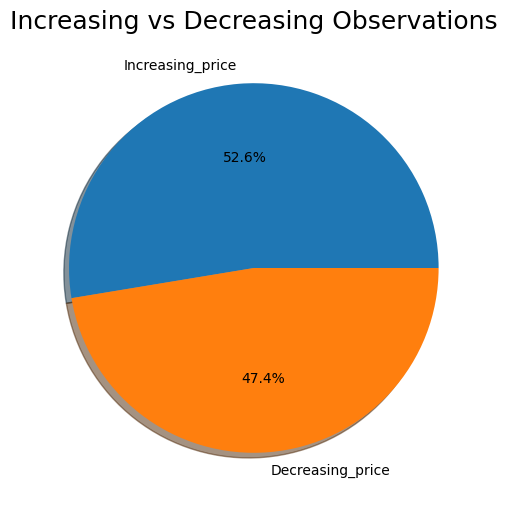

In [4]:
big_df = news 
incr = len(big_df[big_df['Price_change']==1])
decr = big_df.shape[0] - incr
incr_ratio = (100 * incr) / big_df.shape[0]
decr_ratio = (100 * decr) / big_df.shape[0]
incr_to_decr = (incr/decr)

print('Dataset contains :\n \
{} ({:.2f}%) number of price increace examples \n \
{}  ({:.2f}%) number of price decrease examples. \n \
{:.2f}  increase to decrease examples ratio'\
.format(incr, decr, incr_ratio, decr_ratio, incr_to_decr))

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[incr, decr], labels=['Increasing_price','Decreasing_price'], shadow=True, autopct='%1.1f%%')
plt.title('Increasing vs Decreasing Observations', fontsize=18)
plt.show()

In [5]:
print(len(dates))
np.sort(dates)

2216


array(['2010-01-05', '2010-01-07', '2010-01-12', ..., '2020-06-09',
       '2020-06-10', '2020-06-11'], dtype=object)

#### Group news dataframe by date , ignore company name.

In [6]:
sent_df = news.groupby(by = 'date').mean()
sent_df = sent_df.drop(['Unnamed: 0', 'Open', 'Close', 'Price_change'], axis=1)
sent_df

C:\Users\vlieg\AppData\Local\Temp\ipykernel_25940\3645713511.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sent_df = news.groupby(by = 'date').mean()


,Volume,Positive,Negative,Neutral
date,,,,
2010-01-05,1.559430e+07,0.018545,0.478500,0.502955
2010-01-07,1.205820e+07,0.838794,0.010908,0.150297
2010-01-12,2.307580e+07,0.843512,0.008981,0.147506
2010-01-14,1.320820e+07,0.492235,0.017017,0.490748
2010-01-21,1.890060e+07,0.009232,0.969351,0.021417
...,...,...,...,...
2020-06-05,5.374403e+07,0.357551,0.130090,0.512359
2020-06-08,6.667680e+07,0.290582,0.216999,0.492419
2020-06-09,7.317539e+07,0.346078,0.208795,0.445127


In [7]:
sp500 =  financial_dataset("^GSPC",2, start_date="2009-01-01",end_date= "2021-01-01")
sp500

[*********************100%***********************]  1 of 1 completed
^GSPC financial dataframe dimensions  (3021, 6)
Positive changes : 1665
Negative changes : 1356
No changes : 0


,Open,Close,Volume,Price_change,date
Date,,,,,
2009-01-02,902.989990,931.799988,4048270000,1,0
2009-01-05,929.169983,927.450012,5413910000,-1,2009-01-05
2009-01-06,931.169983,934.700012,5392620000,1,2009-01-06
2009-01-07,927.450012,906.650024,4704940000,-1,2009-01-07
2009-01-08,905.729980,909.729980,4991550000,1,2009-01-08
...,...,...,...,...,...
2020-12-24,3694.030029,3703.060059,1883780000,1,2020-12-24
2020-12-28,3723.030029,3735.360107,3535460000,1,2020-12-28
2020-12-29,3750.010010,3727.040039,3393290000,-1,2020-12-29


Creating final data frame for combined data

In [8]:
data = sp500.merge(sent_df, on='date', how='inner')
data = data.drop(['Open', 'Volume_x'], axis=1)
data = data.rename({'Volume_y':'Volume'}, axis=1)
data = data[['date','Volume', 'Close', 'Positive', 'Negative', 'Neutral', 'Price_change']]
data

,date,Volume,Close,Positive,Negative,Neutral,Price_change
0,2010-01-05,1.559430e+07,1136.520020,0.018545,0.478500,0.502955,1
1,2010-01-07,1.205820e+07,1141.689941,0.838794,0.010908,0.150297,1
2,2010-01-12,2.307580e+07,1136.219971,0.843512,0.008981,0.147506,-1
3,2010-01-14,1.320820e+07,1148.459961,0.492235,0.017017,0.490748,1
4,2010-01-21,1.890060e+07,1116.479980,0.009232,0.969351,0.021417,-1
...,...,...,...,...,...,...,...
2211,2020-06-05,5.374403e+07,3193.929932,0.357551,0.130090,0.512359,1
2212,2020-06-08,6.667680e+07,3232.389893,0.290582,0.216999,0.492419,1
2213,2020-06-09,7.317539e+07,3207.179932,0.346078,0.208795,0.445127,-1
2214,2020-06-10,9.306736e+07,3190.139893,0.383614,0.063217,0.553169,-1


In [9]:
data.to_csv('Datasets/sp500_with_sentiment.csv')